In [1]:
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
#%matplotlib notebook

model = load_model('i_predict CD_3D')

In [2]:
sc = StandardScaler()

In [3]:
df_aa = pd.read_csv('CD_3D 0.4-0.9V_std', usecols=[1,2,3,4,5])

In [4]:
df_a = df_aa.head(7225)
df_a

,x座標,y座標,z座標,V[V],i[A/m^2]
0,1.484631,1.600103,0.720667,-1.462261,1.042808
1,1.484631,1.630870,0.720667,-1.462261,1.048854
2,1.484631,1.630870,0.360358,-1.462261,1.084995
3,1.256258,1.661637,0.360358,-1.462261,1.150019
4,1.370444,1.661637,0.360358,-1.462261,1.119527
...,...,...,...,...,...
7220,-1.027474,-1.661194,-0.720567,-1.462261,1.748646
7221,-1.027474,-1.661194,-1.080876,-1.462261,1.748732
7222,-0.913287,-1.630427,-1.080876,-1.462261,1.731055
7223,-0.913287,-1.661194,-0.720567,-1.462261,1.732756


In [5]:
df_ab = pd.read_csv('CD_3D 0.4-0.9V', usecols=[1,2,3,4,5])
df_c  = df_ab.head(7225)
df_c

,x座標,y座標,z座標,V[V],i[A/m^2]
0,0.000800,0.010441,0.000633,0.4,27966.558421
1,0.000800,0.010540,0.000633,0.4,28018.444979
2,0.000800,0.010540,0.000617,0.4,28328.592610
3,0.000738,0.010638,0.000617,0.4,28886.594133
4,0.000769,0.010638,0.000617,0.4,28624.930799
...,...,...,...,...,...
7220,0.000123,0.000000,0.000567,0.4,34023.724907
7221,0.000123,0.000000,0.000550,0.4,34024.467848
7222,0.000154,0.000099,0.000550,0.4,33872.768657
7223,0.000154,0.000000,0.000567,0.4,33887.366289


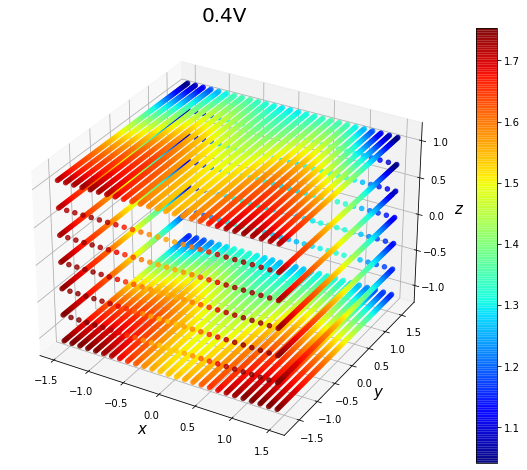

In [6]:
#正規化されてるグラフ
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(111, projection='3d')

sc1 = ax1.scatter3D(df_a['x座標'], df_a['y座標'],df_a['z座標'], c=df_a['i[A/m^2]'], cmap='jet', alpha=0.8) 
plt.colorbar(sc1)

ax1.set_title("0.4V", fontsize=20)
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('$y$', fontsize=15)
ax1.set_zlabel('$z$', fontsize=15)

plt.show()

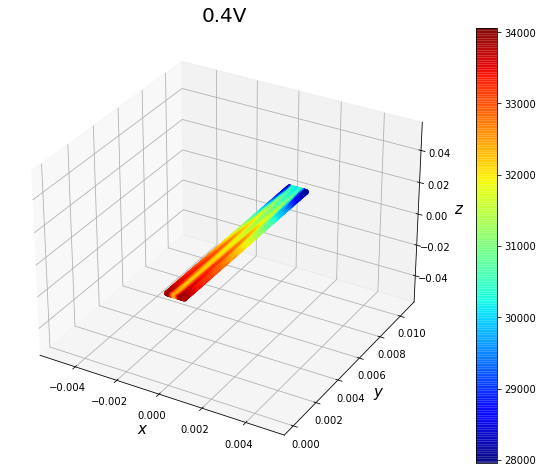

In [7]:
#正規化されてないグラフ
fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111, projection='3d')

sc2 = ax2.scatter(df_c['x座標'], df_c['y座標'],df_c['z座標'], c=df_c['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc2)

ax2.set_title("0.4V", fontsize=20)
ax2.set_xlabel('$x$', fontsize=15)
ax2.set_ylabel('$y$', fontsize=15)
ax2.set_zlabel('$z$', fontsize=15)

ax2.set_xlim(-0.0055,0.0055)
#ax2.set_ylim(0,0.015)
ax2.set_zlim(-0.055,0.055)

plt.show()
#plt.savefig('PEM_CD_COMSOL.png')

In [8]:
df_v = df_aa.loc[:,'V[V]']
v_mean = df_v.mean()
v_std = df_v.std()
print(v_mean)
print(v_std)

1.0651521660369668e-16
1.0000053234388353


In [9]:
#predictで正規化された出力求める→全てのパラメータを正規化から戻す

In [10]:
#v_a =   np.array(v)*v_std + v_mean 

In [11]:
#v_a

In [12]:
df_pre = pd.read_csv('CD_3D 0.4-0.9V_std', usecols=[1,2,3,4])

In [13]:
df_i_pre = pd.DataFrame(model.predict(df_pre), columns = ['i[A/m^2]'])

In [14]:
df_i_pre

,i[A/m^2]
0,1.062990
1,1.054635
2,1.078931
3,1.148258
4,1.105452
...,...
93920,-1.638992
93921,-1.637262
93922,-1.639617
93923,-1.640977


In [15]:
df = pd.concat([df_pre, df_i_pre], axis=1)

In [16]:
df_b = df.head(7225)
df_b

,x座標,y座標,z座標,V[V],i[A/m^2]
0,1.484631,1.600103,0.720667,-1.462261,1.062990
1,1.484631,1.630870,0.720667,-1.462261,1.054635
2,1.484631,1.630870,0.360358,-1.462261,1.078931
3,1.256258,1.661637,0.360358,-1.462261,1.148258
4,1.370444,1.661637,0.360358,-1.462261,1.105452
...,...,...,...,...,...
7220,-1.027474,-1.661194,-0.720567,-1.462261,1.741581
7221,-1.027474,-1.661194,-1.080876,-1.462261,1.739541
7222,-0.913287,-1.630427,-1.080876,-1.462261,1.724721
7223,-0.913287,-1.661194,-0.720567,-1.462261,1.730197


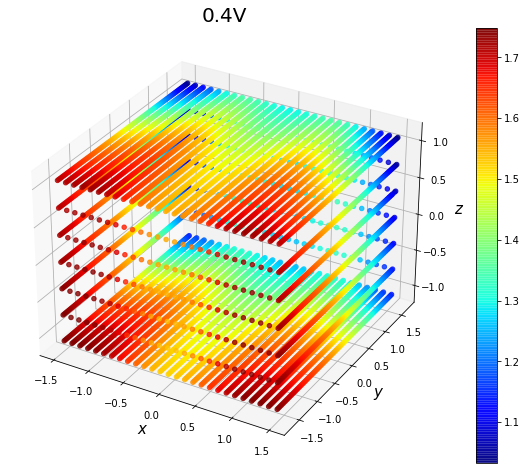

In [17]:
fig3 = plt.figure(figsize=(12, 8))
ax3 = fig3.add_subplot(111, projection='3d')

sc3 = ax3.scatter(df_b['x座標'], df_b['y座標'],df_b['z座標'], c=df_b['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc3)

ax3.set_title("0.4V", fontsize=20)
ax3.set_xlabel('$x$', fontsize=15)
ax3.set_ylabel('$y$', fontsize=15)
ax3.set_zlabel('$z$', fontsize=15)

#plt.savefig('PEM_CD_Predict_stdL.png')
plt.show()

In [18]:
df_i = pd.read_csv('CD_3D 0.4-0.9V', usecols=[5])

In [19]:
df_i.mean()

i[A/m^2]    19017.676022
dtype: float64

In [20]:
df_i.std()

i[A/m^2]    8581.572725
dtype: float64

In [21]:
df_i_re = (df_i_pre*df_i.std() + df_i.mean()).head(7225)  #iの予測値の標準化を戻す
df_i_re

,i[A/m^2]
0,28139.798517
1,28068.099292
2,28276.604733
3,28871.534283
4,28504.193275
...,...
7220,33963.179714
7221,33945.673061
7222,33818.496373
7223,33865.487002


In [22]:
df_i_re_c = df_i_re.head(7225)

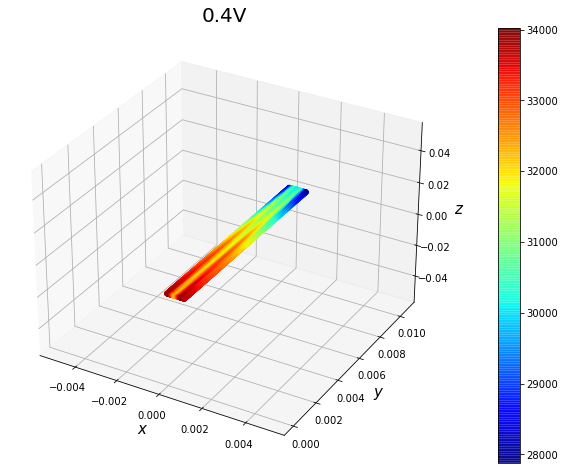

In [23]:
fig4 = plt.figure(figsize=(20, 8))
ax4 = fig4.add_subplot(111, projection='3d')

sc4 = ax4.scatter(df_c['x座標'], df_c['y座標'], df_c['z座標'],c=df_i_re_c['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc4)

ax4.set_title("0.4V", fontsize=20)
ax4.set_xlabel('$x$', fontsize=15)
ax4.set_ylabel('$y$', fontsize=15)
ax4.set_zlabel('$z$', fontsize=15)

ax4.set_xlim(-0.0055,0.0055)
ax4.set_zlim(-0.055,0.055)
plt.savefig('PEM_CD_Predict.png')
plt.show()